
Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Rows: 17 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (11): number_of_features, LGBM_corr_mean, LGBM_corr_se, LASSO_corr_mean,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


number_of_features,LGBM_corr_mean,LGBM_corr_se,LASSO_corr_mean,LASSO_corr_se,rrBLUP_corr_mean,rrBLUP_corr_se,RGB_corr_mean,RGB_corr_se,ssRGB_corr_mean,ssRGB_corr_se
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25,0.3355685,0.02204941,0.2500228,0.01871250,0.2651910,0.01500937,0.3569282,0.03353549,0.2790639,0.02201531
50,0.3697443,0.01790803,0.3371935,0.02092814,0.3111056,0.02114456,0.3965258,0.02549444,0.3127121,0.02725342
75,0.3843666,0.01803543,0.3741553,0.01619833,0.3290593,0.02609995,0.4150443,0.02338425,0.3637739,0.02220761
100,0.3974597,0.02545694,0.3968060,0.01833130,0.3499974,0.01871672,0.4241219,0.02533026,0.3923774,0.01812595
125,0.4048104,0.01976870,0.4164990,0.01979162,0.3644910,0.01516920,0.4343311,0.02320559,0.4139863,0.01727807
150,0.4229910,0.01870688,0.4275249,0.01909305,0.3716907,0.01569330,0.4391359,0.02564410,0.4329245,0.01787060


Warning message:
“Removed 55 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 55 rows containing missing values or values outside the scale range
(`geom_point()`).”


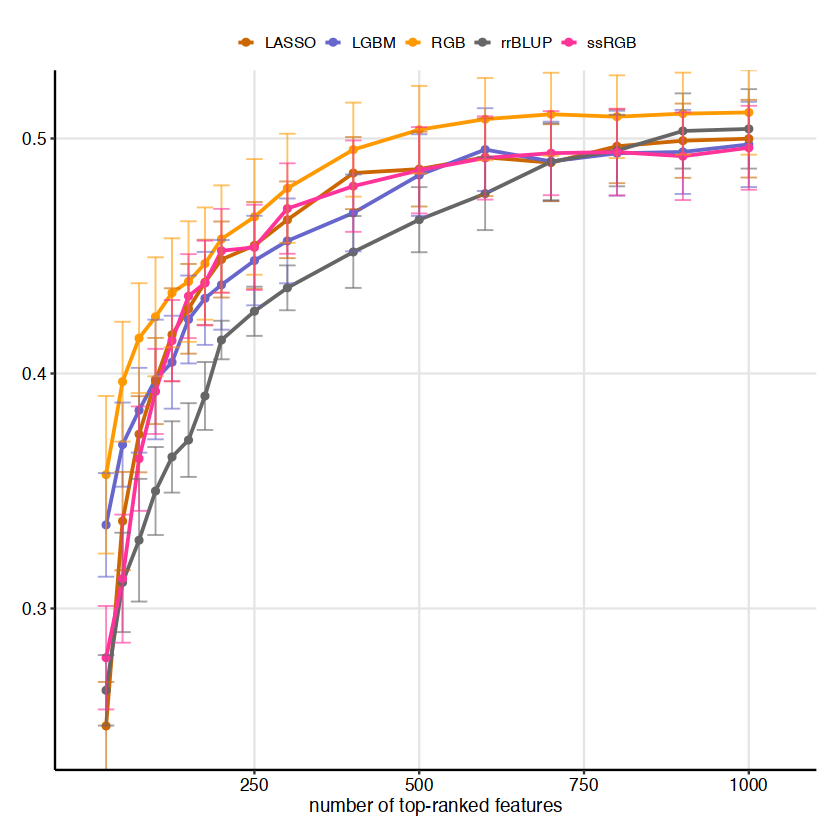

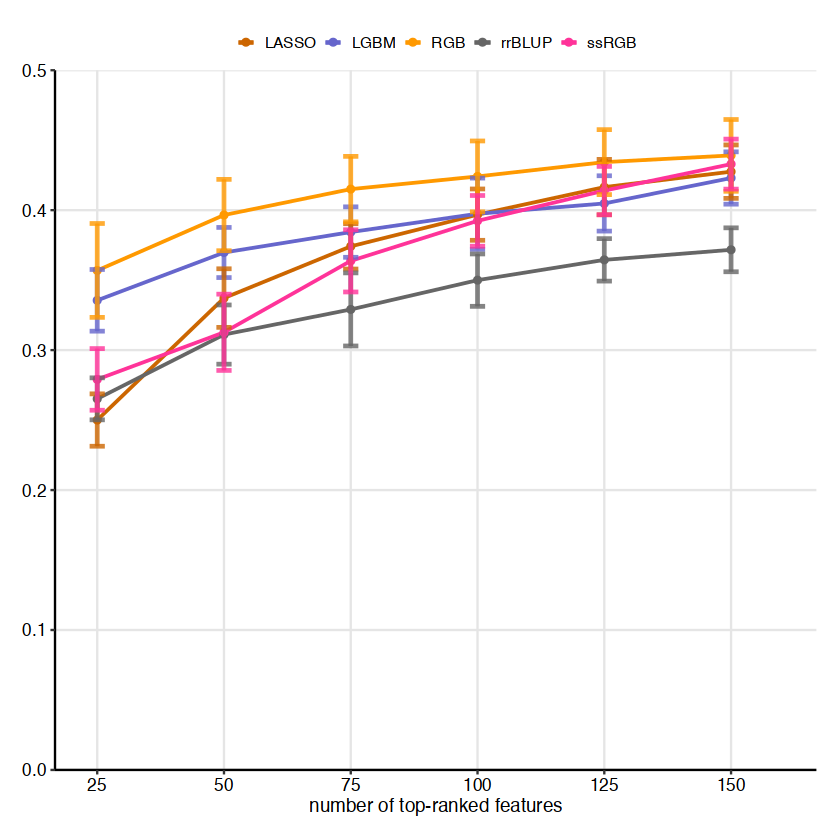

In [1]:
# 加载必要的包
library(ggplot2)
library(dplyr)
library(tidyr)
library(readr)

# 从CSV文件读取数据
df <- read_csv("./summary_beak_length.csv")

# 查看数据结构
head(df)

# 将数据转换为长格式
df_long <- df %>%
  pivot_longer(
    cols = -number_of_features,
    names_to = c("model", ".value"),
    names_sep = "_corr_"
  ) %>%
  rename(mean = mean, se = se)

# 使用你提供的具体颜色代码
model_colors <- c(
  "RGB" = "#FF9900",      # 橙色
  "ssRGB" = "#FF3399",    # 粉红色
  "LGBM" = "#6666CC",     # 蓝紫色
  "LASSO" = "#CC6600",    # 棕橙色
  "rrBLUP" = "#666666"    # 灰色
)


# 绘制图形（带误差线）
ggplot(df_long, aes(x = number_of_features, y = mean, color = model)) +
  geom_line(linewidth = 0.8) +
  geom_point(size = 1.5) +
  geom_errorbar(
    aes(ymin = mean - se, ymax = mean + se),
    width = 25,  # 误差线的宽度
    alpha = 0.6,  # 稍微透明
    linewidth = 0.4
  ) +
  scale_color_manual(values = model_colors) +
  labs(
    x = "number of top-ranked features",
    y = NULL,  # 原图y轴没有标签
    color = "Model"
  ) +
  theme_bw() +
  theme(
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(color = "black"),
    legend.position = "top",
    legend.title = element_blank(),
    legend.box.spacing = unit(0.2, "cm"),
    legend.key.size = unit(0.4, "cm"),
    legend.text = element_text(size = 9),
    axis.text = element_text(size = 10, color = "black"),
    axis.title = element_text(size = 11, color = "black"),
    plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm")
  ) +
  scale_x_continuous(
    breaks = c(250, 500, 750, 1000),
    limits = c(0, 1050)
  ) +
  scale_y_continuous(
    expand = c(0, 0)
  ) +
  guides(
    color = guide_legend(nrow = 1, byrow = TRUE)
  )

  # 绘制图形（带误差线）
ggplot(df_long, aes(x = number_of_features, y = mean, color = model)) +
  geom_line(linewidth = 0.8) +
  geom_point(size = 1.5) +
  geom_errorbar(
    aes(ymin = mean - se, ymax = mean + se),
    width = 3,  # 误差线的宽度
    alpha = 0.8,  # 稍微透明
    linewidth = 1
  ) +
  scale_color_manual(values = model_colors) +
  labs(
    x = "number of top-ranked features",
    y = NULL,  # 原图y轴没有标签
    color = "Model"
  ) +
  theme_bw() +
  theme(
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(color = "black"),
    legend.position = "top",
    legend.title = element_blank(),
    legend.box.spacing = unit(0.2, "cm"),
    legend.key.size = unit(0.4, "cm"),
    legend.text = element_text(size = 9),
    axis.text = element_text(size = 10, color = "black"),
    axis.title = element_text(size = 11, color = "black"),
    plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm")
  ) +
  scale_x_continuous(
    breaks = c(25, 50, 75, 100, 125, 150),
    limits = c(NA, 160)
  ) +
  scale_y_continuous(
    limits = c(0, 0.5),
    expand = c(0, 0)
  ) +
  guides(
    color = guide_legend(nrow = 1, byrow = TRUE)
  )


Rows: 17 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (11): number_of_features, LGBM_corr_mean, LGBM_corr_se, LASSO_corr_mean,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


number_of_features,LGBM_corr_mean,LGBM_corr_se,LASSO_corr_mean,LASSO_corr_se,rrBLUP_corr_mean,rrBLUP_corr_se,RGB_corr_mean,RGB_corr_se,ssRGB_corr_mean,ssRGB_corr_se
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25,0.2770391,0.02404951,0.1944787,0.02059176,0.08196418,0.02775037,0.3063514,0.02396884,0.2788735,0.02698260
50,0.3367969,0.02214221,0.2734131,0.01961830,0.15357650,0.03262329,0.3512519,0.01912248,0.2940536,0.01957280
75,0.3529400,0.01973726,0.3185431,0.01741500,0.23197216,0.02561810,0.3753779,0.01807415,0.3302521,0.02169122
100,0.3760256,0.02541636,0.3518947,0.02129851,0.27350718,0.02224053,0.3860380,0.01790566,0.3632707,0.02379164
125,0.3801991,0.02641720,0.3784698,0.02543379,0.30577574,0.02885541,0.3910316,0.01972145,0.3791762,0.02304329
150,0.3890973,0.02245644,0.3978401,0.02414272,0.32612109,0.02258469,0.4020973,0.01973785,0.3954500,0.02281529


Warning message:
“Removed 55 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 55 rows containing missing values or values outside the scale range
(`geom_point()`).”


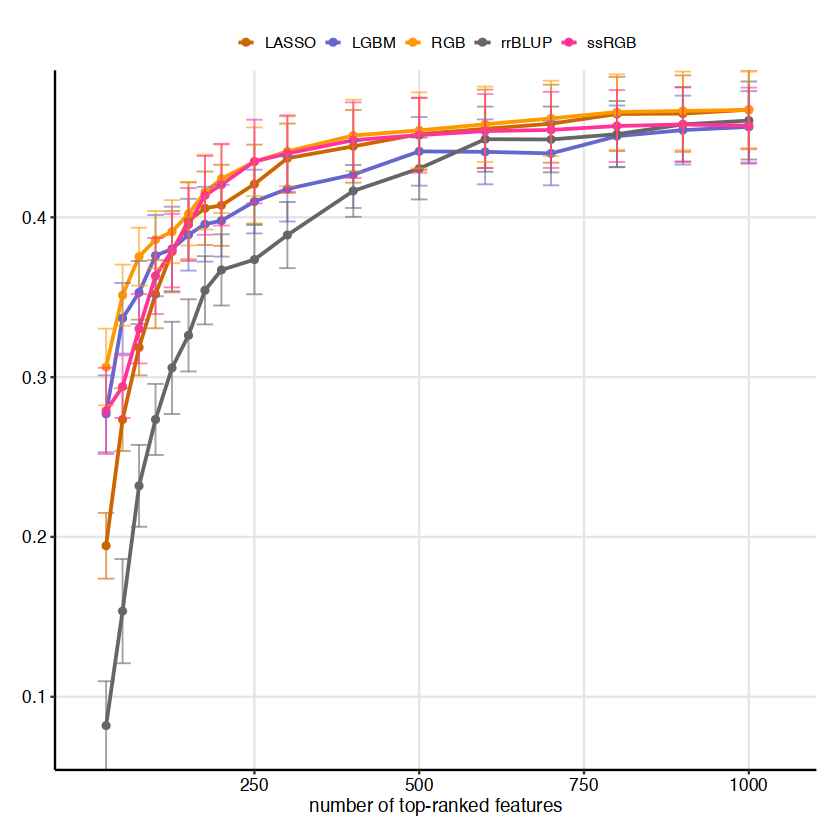

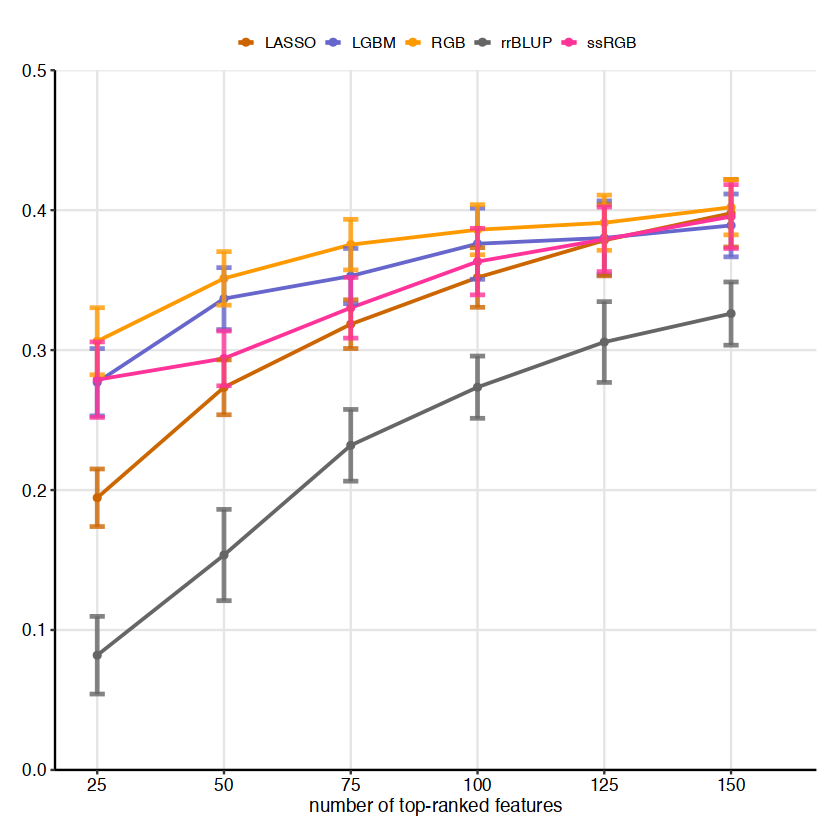

In [2]:
# 加载必要的包
library(ggplot2)
library(dplyr)
library(tidyr)
library(readr)

# 从CSV文件读取数据
df <- read_csv("./summary_beak_depth.csv")

# 查看数据结构
head(df)

# 将数据转换为长格式
df_long <- df %>%
  pivot_longer(
    cols = -number_of_features,
    names_to = c("model", ".value"),
    names_sep = "_corr_"
  ) %>%
  rename(mean = mean, se = se)

# 使用你提供的具体颜色代码
model_colors <- c(
  "RGB" = "#FF9900",      # 橙色
  "ssRGB" = "#FF3399",    # 粉红色
  "LGBM" = "#6666CC",     # 蓝紫色
  "LASSO" = "#CC6600",    # 棕橙色
  "rrBLUP" = "#666666"    # 灰色
)


# 绘制图形（带误差线）
ggplot(df_long, aes(x = number_of_features, y = mean, color = model)) +
  geom_line(linewidth = 0.8) +
  geom_point(size = 1.5) +
  geom_errorbar(
    aes(ymin = mean - se, ymax = mean + se),
    width = 25,  # 误差线的宽度
    alpha = 0.6,  # 稍微透明
    linewidth = 0.4
  ) +
  scale_color_manual(values = model_colors) +
  labs(
    x = "number of top-ranked features",
    y = NULL,  # 原图y轴没有标签
    color = "Model"
  ) +
  theme_bw() +
  theme(
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(color = "black"),
    legend.position = "top",
    legend.title = element_blank(),
    legend.box.spacing = unit(0.2, "cm"),
    legend.key.size = unit(0.4, "cm"),
    legend.text = element_text(size = 9),
    axis.text = element_text(size = 10, color = "black"),
    axis.title = element_text(size = 11, color = "black"),
    plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm")
  ) +
  scale_x_continuous(
    breaks = c(250, 500, 750, 1000),
    limits = c(0, 1050)
  ) +
  scale_y_continuous(
    expand = c(0, 0)
  ) +
  guides(
    color = guide_legend(nrow = 1, byrow = TRUE)
  )

  # 绘制图形（带误差线）
ggplot(df_long, aes(x = number_of_features, y = mean, color = model)) +
  geom_line(linewidth = 0.8) +
  geom_point(size = 1.5) +
  geom_errorbar(
    aes(ymin = mean - se, ymax = mean + se),
    width = 3,  # 误差线的宽度
    alpha = 0.8,  # 稍微透明
    linewidth = 1
  ) +
  scale_color_manual(values = model_colors) +
  labs(
    x = "number of top-ranked features",
    y = NULL,  # 原图y轴没有标签
    color = "Model"
  ) +
  theme_bw() +
  theme(
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(color = "black"),
    legend.position = "top",
    legend.title = element_blank(),
    legend.box.spacing = unit(0.2, "cm"),
    legend.key.size = unit(0.4, "cm"),
    legend.text = element_text(size = 9),
    axis.text = element_text(size = 10, color = "black"),
    axis.title = element_text(size = 11, color = "black"),
    plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm")
  ) +
  scale_x_continuous(
    breaks = c(25, 50, 75, 100, 125, 150),
    limits = c(NA, 160)
  ) +
  scale_y_continuous(
    limits = c(0, 0.5),
    expand = c(0, 0)
  ) +
  guides(
    color = guide_legend(nrow = 1, byrow = TRUE)
  )


Rows: 17 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (11): number_of_features, LGBM_corr_mean, LGBM_corr_se, LASSO_corr_mean,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


number_of_features,LGBM_corr_mean,LGBM_corr_se,LASSO_corr_mean,LASSO_corr_se,rrBLUP_corr_mean,rrBLUP_corr_se,RGB_corr_mean,RGB_corr_se,ssRGB_corr_mean,ssRGB_corr_se
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25,0.3552786,0.03103333,0.2543529,0.02394966,0.1760027,0.02989509,0.3634119,0.02057306,0.3492817,0.02237230
50,0.3807010,0.01978787,0.3089221,0.02852245,0.2421576,0.02796293,0.3910100,0.02047981,0.3560768,0.02542275
75,0.4004219,0.01760710,0.3724460,0.02359798,0.2648254,0.02181993,0.4165645,0.02187864,0.4019150,0.02888011
100,0.4138431,0.01952788,0.3958115,0.02456073,0.3001109,0.02635600,0.4343472,0.02487358,0.4280577,0.01844278
125,0.4215437,0.02517926,0.4127583,0.02514843,0.3277449,0.02308156,0.4556569,0.02563313,0.4435989,0.01846566
150,0.4280260,0.02365869,0.4209071,0.02310114,0.3548496,0.02340698,0.4664388,0.02688818,0.4531863,0.02238473


Warning message:
“Removed 55 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 55 rows containing missing values or values outside the scale range
(`geom_point()`).”


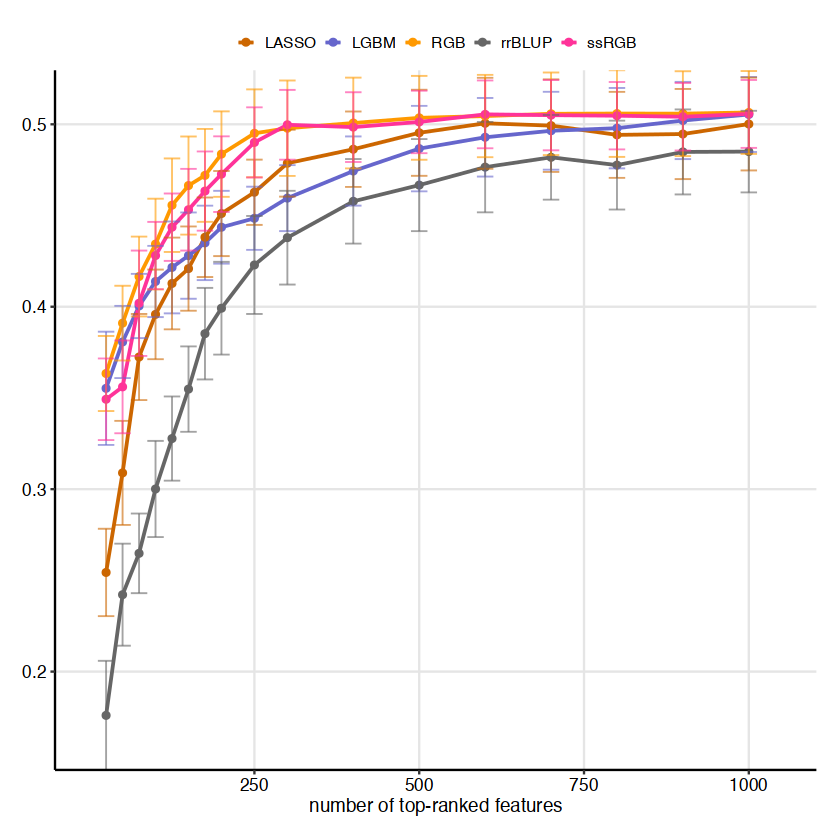

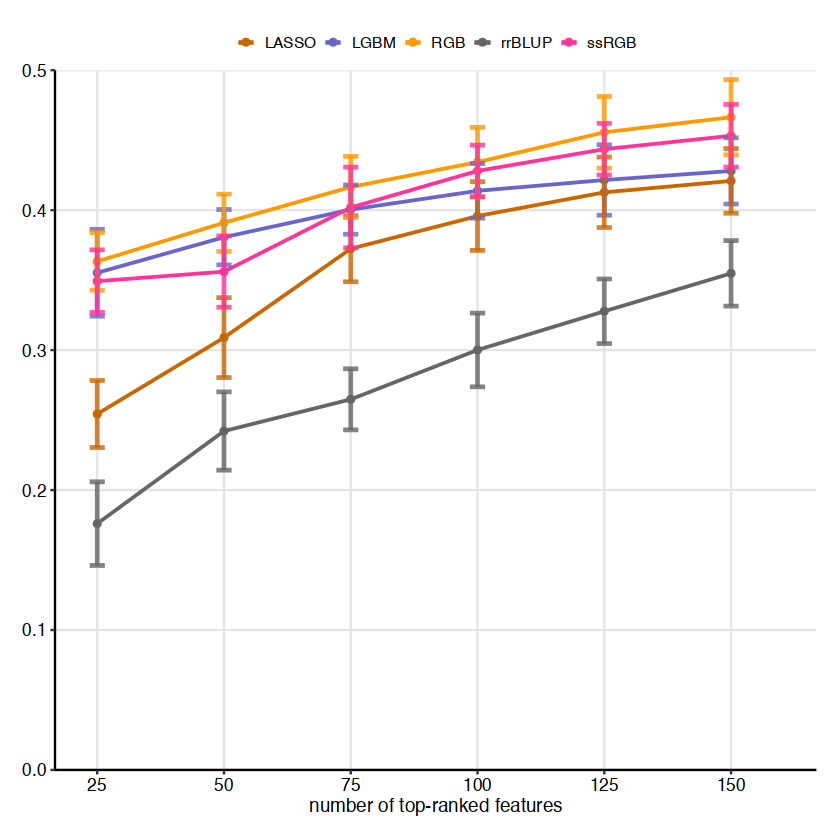

In [3]:
# 加载必要的包
library(ggplot2)
library(dplyr)
library(tidyr)
library(readr)

# 从CSV文件读取数据
df <- read_csv("./summary_beak_width.csv")

# 查看数据结构
head(df)

# 将数据转换为长格式
df_long <- df %>%
  pivot_longer(
    cols = -number_of_features,
    names_to = c("model", ".value"),
    names_sep = "_corr_"
  ) %>%
  rename(mean = mean, se = se)

# 使用你提供的具体颜色代码
model_colors <- c(
  "RGB" = "#FF9900",      # 橙色
  "ssRGB" = "#FF3399",    # 粉红色
  "LGBM" = "#6666CC",     # 蓝紫色
  "LASSO" = "#CC6600",    # 棕橙色
  "rrBLUP" = "#666666"    # 灰色
)


# 绘制图形（带误差线）
ggplot(df_long, aes(x = number_of_features, y = mean, color = model)) +
  geom_line(linewidth = 0.8) +
  geom_point(size = 1.5) +
  geom_errorbar(
    aes(ymin = mean - se, ymax = mean + se),
    width = 25,  # 误差线的宽度
    alpha = 0.6,  # 稍微透明
    linewidth = 0.4
  ) +
  scale_color_manual(values = model_colors) +
  labs(
    x = "number of top-ranked features",
    y = NULL,  # 原图y轴没有标签
    color = "Model"
  ) +
  theme_bw() +
  theme(
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(color = "black"),
    legend.position = "top",
    legend.title = element_blank(),
    legend.box.spacing = unit(0.2, "cm"),
    legend.key.size = unit(0.4, "cm"),
    legend.text = element_text(size = 9),
    axis.text = element_text(size = 10, color = "black"),
    axis.title = element_text(size = 11, color = "black"),
    plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm")
  ) +
  scale_x_continuous(
    breaks = c(250, 500, 750, 1000),
    limits = c(0, 1050)
  ) +
  scale_y_continuous(
    expand = c(0, 0)
  ) +
  guides(
    color = guide_legend(nrow = 1, byrow = TRUE)
  )

  # 绘制图形（带误差线）
ggplot(df_long, aes(x = number_of_features, y = mean, color = model)) +
  geom_line(linewidth = 0.8) +
  geom_point(size = 1.5) +
  geom_errorbar(
    aes(ymin = mean - se, ymax = mean + se),
    width = 3,  # 误差线的宽度
    alpha = 0.8,  # 稍微透明
    linewidth = 1
  ) +
  scale_color_manual(values = model_colors) +
  labs(
    x = "number of top-ranked features",
    y = NULL,  # 原图y轴没有标签
    color = "Model"
  ) +
  theme_bw() +
  theme(
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(color = "black"),
    legend.position = "top",
    legend.title = element_blank(),
    legend.box.spacing = unit(0.2, "cm"),
    legend.key.size = unit(0.4, "cm"),
    legend.text = element_text(size = 9),
    axis.text = element_text(size = 10, color = "black"),
    axis.title = element_text(size = 11, color = "black"),
    plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm")
  ) +
  scale_x_continuous(
    breaks = c(25, 50, 75, 100, 125, 150),
    limits = c(NA, 160)
  ) +
  scale_y_continuous(
    limits = c(0, 0.5),
    expand = c(0, 0)
  ) +
  guides(
    color = guide_legend(nrow = 1, byrow = TRUE)
  )
